# Project: Investigate a TMDB Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a>
    <ul>
    <li><a href="#w1">Removing duplicates rows and empty rows</a></li>
    </ul>
</li>
<li><a href="#eda">Exploratory Data Analysis</a>
    <ul>
    <li><a href= "q1">Which genres are most popular from year to year?</a></li>
    <li><a href= "q2">What kinds of properties are associated with movies that have high revenues?</a></li>
    <li><a href= "q3">How movies budget and popularity changes over the years?</a></li>
    <li><a href= "q4">Top 5 grossing movies</a></li>
    <li><a href= "q5">Top 5 casted actors</a></li>
    <li><a href= "q6">Top 5 voted movies</a></li>
    </ul>
</li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# loading the data set
movie_df = pd.read_csv('data/tmdb-movies.csv')
movie_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='w1'></a>
### Data Cleaning - Removing duplicates rows and empty rows

Now we have removed unused rows and data, and we are going to remove the null rows and duplicated data that can affect on our results.

In [3]:
#chcking total number of duplicate rows
sum(movie_df.duplicated())

1

In [4]:
#drop the duplicate rows
movie_df.drop_duplicates(inplace=True)

In [5]:
#checking for null values
movie_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
#dropping the null values where row is genres and cast
movie_df.dropna(subset=['genres'], inplace=True)  
movie_df.dropna(subset=['cast'], inplace=True)  
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10767 entries, 0 to 10865
Data columns (total 21 columns):
id                      10767 non-null int64
imdb_id                 10759 non-null object
popularity              10767 non-null float64
budget                  10767 non-null int64
revenue                 10767 non-null int64
original_title          10767 non-null object
cast                    10767 non-null object
homepage                2903 non-null object
director                10731 non-null object
tagline                 8010 non-null object
keywords                9322 non-null object
overview                10764 non-null object
runtime                 10767 non-null int64
genres                  10767 non-null object
production_companies    9791 non-null object
release_date            10767 non-null object
vote_count              10767 non-null int64
vote_average            10767 non-null float64
release_year            10767 non-null int64
budget_adj              1

<a id='eda'></a>
## Exploratory Data Analysis

<a id='q1'></a>
### Which genres are most popular from year to year? 

**Answer:** Drama genres is most popular from year to year. Where History, TV Movies and western movies have lowest popularity.

In [7]:
'''
gettig the most populer generes from the dataset
'''
def most_popular_genres(df):
    # splitting the genres and adding it in the data_generes
    list_genres = df['genres'].str.cat(sep="|").split("|")
    #setting ascending true
    list_genres = pd.Series(list_genres).value_counts(ascending=True) 
    return list_genres

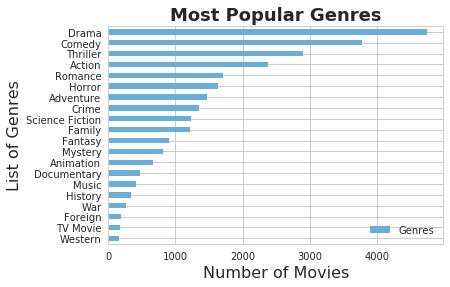

In [8]:
# getting the most popular generes
most_pop_genres = most_popular_genres(movie_df)
# plotting the horizontal bar graph
sns.set(style="whitegrid")

graph = most_pop_genres.plot.barh(color=sns.color_palette("Blues",1))
graph.set_title("Most Popular Genres", fontsize=18, fontweight='bold')
graph.set_xlabel("Number of Movies", fontsize=16)
graph.set_ylabel("List of Genres", fontsize=16)
graph.legend(['Genres'], loc = "lower right")

<a id='q2'></a>
### What kinds of properties are associated with movies that have high revenues?

**Answer:** For movies that have high revenues are generally associated with casts, revenues, budget and movie production company. I have made this analysis based on it’s genres, popularity, revenues and budget.
Following type of properties associated with high revenues movies
- Genres type: Adventure
- Population mean: 9.763478
- Revenues mean: 1645656693.200000 dollars
- Budget mean: 195200000.000000 dollars

Standard deviation for the revenue is 117472853.73722987 in dollars.

In [9]:
#standard deviation of revenue
revenue_std = np.std(movie_df['revenue'])
revenue_std

117472853.73722987

In [10]:
# below method returns the 10th time higher value than revenue_std
def get_high_revenue_data():
    properties = []
    df = pd.DataFrame()
    for data_point in movie_df.loc[:,'revenue']:
            if data_point > (10.0 * revenue_std):
                properties.append(movie_df.loc[movie_df['revenue'] == data_point])
    return df.append(properties)

In [11]:
higher_revenue_df = get_high_revenue_data()
most_popular_genres(higher_revenue_df)

Drama              1
Romance            1
Animation          1
Crime              1
Family             2
Fantasy            3
Thriller           3
Science Fiction    6
Action             7
Adventure          8
dtype: int64

In [12]:
#this function gives the discription of data field and visualization of data
def describe_data(data, title): 
    print ('Mean of %s is %f' % (title, np.mean(data))) 
    print ('Standard Deviation of %s is %f' % (title, np.std(data)))
    print ('Minimum of %s is %f ' % (title, np.min(data)))
    print ('Maximum of %s is %f ' %(title, np.max(data)))
    print ('-----------------------------------')

In [13]:
# displaying the description of the data
describe_data(higher_revenue_df['revenue'],"Revenue")
describe_data(higher_revenue_df['budget'],"Budget")
describe_data(higher_revenue_df['popularity'],"Popularity")

Mean of Revenue is 1645656693.200000
Standard Deviation of Revenue is 452017096.505688
Minimum of Revenue is 1215439994.000000 
Maximum of Revenue is 2781505847.000000 
-----------------------------------
Mean of Budget is 195200000.000000
Standard Deviation of Budget is 43201388.866563
Minimum of Budget is 125000000.000000 
Maximum of Budget is 280000000.000000 
-----------------------------------
Mean of Popularity is 9.763478
Standard Deviation of Popularity is 8.017844
Minimum of Popularity is 4.355219 
Maximum of Popularity is 32.985763 
-----------------------------------


<a id='q3'></a>
### How movies budget and popularity changes over the years?

**Answer:** Here we have grouped the dataset to the years and displayed the graph of it. 
- First graph displays the how budget of movies are increased over the years. 

- Second graph displays the popularity of the movies in graph.

In [14]:
data_movie = movie_df.groupby(['release_year'],as_index=False).mean()
data_movie.head()

,release_year,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
0,1960,15715.281250,0.458932,6.892796e+05,4.531406e+06,110.656250,77.531250,6.325000,5.082036e+06,3.340991e+07
1,1961,18657.000000,0.422827,1.488290e+06,1.089420e+07,119.419355,77.580645,6.374194,1.085687e+07,7.947167e+07
2,1962,17001.062500,0.454783,1.710066e+06,6.736870e+06,124.343750,74.750000,6.343750,1.232693e+07,4.856238e+07
3,1963,16556.000000,0.502706,2.156809e+06,5.511911e+06,111.323529,82.823529,6.329412,1.535687e+07,3.924580e+07
4,1964,17379.571429,0.412428,9.400753e+05,8.118614e+06,109.214286,74.690476,6.211905,6.608980e+06,5.707603e+07


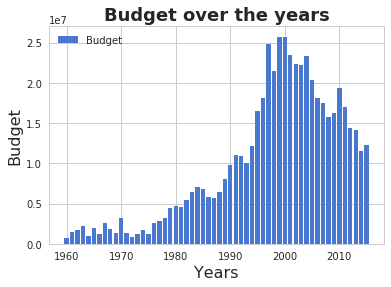

In [15]:
sns.set(style="whitegrid")
fig = plt.bar(data_movie["release_year"], data_movie["budget"], color=sns.color_palette("muted",1))

plt.title('Budget over the years', fontsize=18, fontweight='bold')
plt.xlabel('Years', fontsize=16)
plt.ylabel('Budget', fontsize=16)
plt.legend(fig, ['Budget'], loc = "upper left")
plt.show()

The graph shows the how popularity changes over the year. We have set movie years in X-axis and budget in Y-axis. From the graph we can say that the popularity of the movie has increased in mid 90’s. And in the year of 2000 the popularity has reached its maximum saturation point. In the graph it looks in year 2015 the popularity is half of the year 2000.

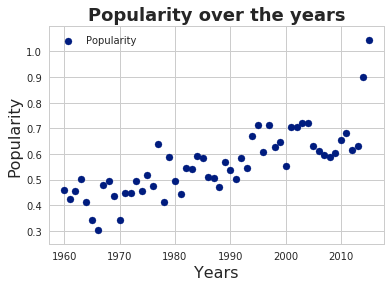

In [16]:
data_movie = movie_df.groupby(['release_year'],as_index=False).mean()

sns.set(style="whitegrid")
plt.scatter(data_movie["release_year"], data_movie["popularity"], color=sns.color_palette("dark",1))
plt.title('Popularity over the years', fontsize=18, fontweight='bold')
plt.xlabel('Years', fontsize=16)
plt.ylabel('Popularity', fontsize=16)
plt.legend(['Popularity'], loc = "upper left")
plt.show()

As per the graph we can say that the popularity of the movies are increasing over the time. The data can be further analysis by the region, known language and the age of the peoples.

<a id='q4'></a>
### Top 5 grossing movies

**Answer:** Star Wars (1977), Avatar(2009), Titanic(1997), The Exorcist(1973), Jaws(1975)

In [17]:
#here we get the net profit from the revenue and budget
profit_adj = movie_df['revenue_adj'] - movie_df['budget_adj']
highest_grossing_film_df = pd.DataFrame({'title':movie_df['original_title'], 'profit_adj':profit_adj, 'release_year': movie_df['release_year']})
highest_grossing_film_df = highest_grossing_film_df.sort_values(['profit_adj'], ascending=False)
highest_grossing_film_df.head()

,profit_adj,release_year,title
1329,2.750137e+09,1977,Star Wars
1386,2.586237e+09,2009,Avatar
5231,2.234714e+09,1997,Titanic
10594,2.128036e+09,1973,The Exorcist
9806,1.878643e+09,1975,Jaws


<a id='q5'></a>
### Top 5 casted actors

**Answer:** Robert De Niro(72),  Samual L. Jackson(71), Bruce Wills(62), Nicolas Cage(61), Michael Caine(53)

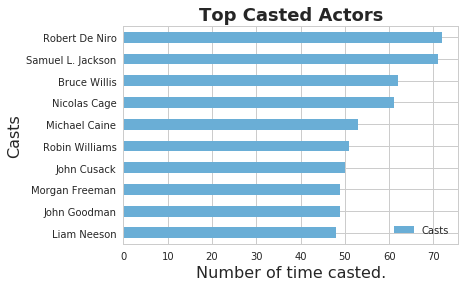

In [18]:
actors_list = movie_df["cast"].str.cat(sep="|").split("|")
actors=pd.Series(actors_list).value_counts(ascending=True)[-10:]

# plotting the horizontal bar graph
sns.set(style="whitegrid")

graph = actors.plot.barh(color=sns.color_palette("Blues",1))
graph.set_title("Top Casted Actors", fontsize=18, fontweight='bold')
graph.set_xlabel("Number of time casted.", fontsize=16)
graph.set_ylabel("Casts", fontsize=16)
graph.legend(['Casts'], loc = "lower right")

In [19]:
actors

Liam Neeson          48
John Goodman         49
Morgan Freeman       49
John Cusack          50
Robin Williams       51
Michael Caine        53
Nicolas Cage         61
Bruce Willis         62
Samuel L. Jackson    71
Robert De Niro       72
dtype: int64

<a id='q6'></a>
### Top 5 voted movies

**Answer:**: Inception(9767), The Avengers(8903), Avatar(8458), The Dark Knight(8432), Django Unchained(7375)

In [20]:
# sorting movie by 'vote_count'
movies_sorted_by_vote = movie_df.sort_values(['vote_count'], ascending=False)
highest_voted_movies = pd.DataFrame({'title': movies_sorted_by_vote['original_title'], 'vote_count': movies_sorted_by_vote['vote_count'],'release_year':movies_sorted_by_vote['release_year'], 'vote_average':movies_sorted_by_vote['vote_average']})
highest_voted_movies.head()

,release_year,title,vote_average,vote_count
1919,2010,Inception,7.9,9767
4361,2012,The Avengers,7.3,8903
1386,2009,Avatar,7.1,8458
2875,2008,The Dark Knight,8.1,8432
4364,2012,Django Unchained,7.7,7375


<a id='conclusions'></a>
## Conclusions
From this analysis we have have found the popular genres and associated properties with it. We have calculated the top grossing movies, casted actors and voted movies. We have also made analysis for budget and popularity with the years. We found that the popularity of the movies are increasing over the time. From the popularity and the budget over the time we found that the popularity do not have any relationship with the budget of movie. The main limitation of this analysis is the null values and duplicate rows. Although we have removed such data from our analysis, but it can be affects the central tendency of the data. Future scope of the analysis will be the the casts with the big budget movies, the total movies done by specific actors.

## References:

- http://www.gregreda.com/2013/10/26/using-pandas-on-the-movielens-dataset/
- https://seaborn.pydata.org/examples/
